# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.007337e+01     6.250546e+00
 * time: 0.005560159683227539
     1     2.978788e+01     5.268067e+00
 * time: 0.016605138778686523
     2     2.941169e+01     1.289211e+01
 * time: 0.04310297966003418
     3     1.768697e+01     4.814346e+00
 * time: 0.07509493827819824
     4     1.338816e+01     1.605806e+00
 * time: 0.10572004318237305
     5     1.151794e+01     1.484157e+00
 * time: 0.13105106353759766
     6     1.036601e+01     1.192861e+00
 * time: 0.1505720615386963
     7     1.001589e+01     8.770249e-01
 * time: 0.17055201530456543
     8     9.564815e+00     1.118565e+00
 * time: 0.19128203392028809
     9     9.270753e+00     8.310591e-01
 * time: 0.212568998336792
    10     9.038213e+00     1.071182e+00
 * time: 0.23514509201049805
    11     8.854510e+00     7.543070e-01
 * time: 0.25744199752807617
    12     8.703650e+00     8.150943e-01
 * time: 0.2743380069732666
    13     8.577211e+00     5.379984e-01
 * time: 0

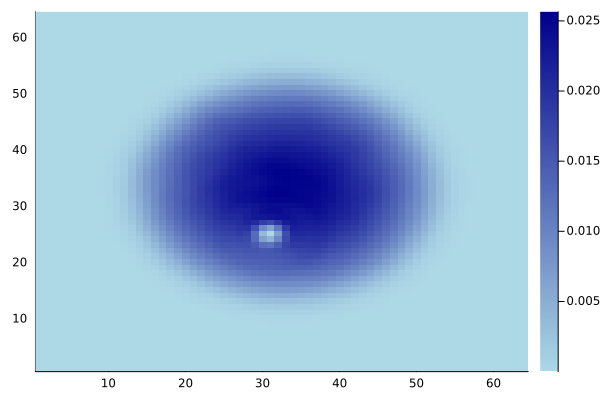

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)